In [503]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import scipy.stats

In [504]:

players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']

In [505]:
players

{'Abrines, Alex': '203518',
 'Acy, Quincy': '203112',
 'Adams, Steven': '203500',
 'Adebayo, Bam': '1628389',
 'Afflalo, Arron': '201167',
 'Aldrich, Cole': '202332',
 'Aldridge, LaMarcus': '200746',
 'Allen, Jarrett': '1628386',
 'Allen, Kadeem': '1628443',
 'Allen, Tony': '2754',
 'Aminu, Al-Farouq': '202329',
 'Anderson, Justin': '1626147',
 'Anderson, Kyle': '203937',
 'Anderson, Ryan': '201583',
 'Anigbogu, Ike': '1628387',
 'Antetokounmpo, Giannis': '203507',
 'Anthony, Carmelo': '2546',
 'Anunoby, OG': '1628384',
 'Arcidiacono, Ryan': '1627853',
 'Ariza, Trevor': '2772',
 'Arthur, Darrell': '201589',
 'Artis, Jamel': '1628503',
 'Asik, Omer': '201600',
 'Augustin, D.J.': '201571',
 'Babbitt, Luke': '202337',
 'Bacon, Dwayne': '1628407',
 'Baker, Ron': '1627758',
 'Baldwin IV, Wade': '1627735',
 'Ball, Lonzo': '1628366',
 'Barea, J.J.': '200826',
 'Barnes, Harrison': '203084',
 'Barton, Will': '203115',
 'Batum, Nicolas': '201587',
 'Bayless, Jerryd': '201573',
 'Baynes, Aron': '

In [506]:
teams[players['Markkanen, Lauri']]

1610612741

In [507]:
franchises = {"Brooklyn Nets": 1610612751, "Minnesota Timberwolves":1610612750 ,"Golden State Warriors": 1610612744, 
              "Los Angeles Clippers": 1610612746, "Los Angeles Lakers": 1610612747, "Washington Wizards": 1610612764, 
              "Milwaukee Bucks": 1610612749, "Toronto Raptors": 1610612761, "Philadelphia 76ers": 1610612755 , 
              "Boston Celtics":1610612738 ,  "Orlando Magic": 1610612753, "Atlanta Hawks":1610612737,
              "Houston Rockets": 1610612745 , "San Antontio Spurs":  1610612759, "New Orleans Pelicans": 1610612740, 
              "Pheonix Suns": 1610612756, "Sacramento Kings": 1610612758, "Portland Trailblazers": 1610612757, 
              "Denver Nuggets":1610612743 , "Memphis Grizzlies": 1610612763, "Miami Heat":1610612748, 
              "Cleveland Cavaliers": 1610612739, "Charlotte Hornets":1610612766, "Chicago Bulls": 1610612741, 
              "New York Knicks": 1610612752, "Indiana Pacers":1610612754 , "Utah Jazz":1610612762 , 
              "Detroit Pistons": 1610612765, "Dallas Mavericks": 1610612742, "Oklahoma City Thunder": 1610612760,  
             }


In [508]:
franchises_by_id = {}
for elem in franchises:
    franchises_by_id[franchises[elem]] = elem
franchises_by_id

{1610612737: 'Atlanta Hawks',
 1610612738: 'Boston Celtics',
 1610612739: 'Cleveland Cavaliers',
 1610612740: 'New Orleans Pelicans',
 1610612741: 'Chicago Bulls',
 1610612742: 'Dallas Mavericks',
 1610612743: 'Denver Nuggets',
 1610612744: 'Golden State Warriors',
 1610612745: 'Houston Rockets',
 1610612746: 'Los Angeles Clippers',
 1610612747: 'Los Angeles Lakers',
 1610612748: 'Miami Heat',
 1610612749: 'Milwaukee Bucks',
 1610612750: 'Minnesota Timberwolves',
 1610612751: 'Brooklyn Nets',
 1610612752: 'New York Knicks',
 1610612753: 'Orlando Magic',
 1610612754: 'Indiana Pacers',
 1610612755: 'Philadelphia 76ers',
 1610612756: 'Pheonix Suns',
 1610612757: 'Portland Trailblazers',
 1610612758: 'Sacramento Kings',
 1610612759: 'San Antontio Spurs',
 1610612760: 'Oklahoma City Thunder',
 1610612761: 'Toronto Raptors',
 1610612762: 'Utah Jazz',
 1610612763: 'Memphis Grizzlies',
 1610612764: 'Washington Wizards',
 1610612765: 'Detroit Pistons',
 1610612766: 'Charlotte Hornets'}

In [509]:
def players_per_team():
    #franchise_val = franchises[team_name]
    team_players = {}
    for elem in franchises_by_id: 
        player_names = []
        for player in players:
            #print(players[player])
            if teams[players[player]] == elem:
                player_names += [player]
        team_players[franchises_by_id[elem]] = player_names
    return team_players


top_two_players = ["Curry, Stephen", "Durant, Kevin"]


def player_stats(name, win):
    #win = True
#     print(win)
#     print(name)
#     print(type(players))
#     print(players[name])
    if (win == True):
        fname = "data/"+players[name]+"-passing-win.json"
    elif (win == False):
        fname = "data/"+players[name]+"-passing-loss.json"
    else:
        fname = "data/"+players[name]+"-passing.json"
    with open(fname, "r") as f:
        data = json.load(f)
    data_with_names = {}
    for elem in data:
        data_with_names[ids[elem]] = data[elem]
    return data_with_names


In [510]:
def pass_to_specific_player(passing_player,receiving_player,win):
    #print(passing_player)
    stats = player_stats(passing_player,win)
    total = 0
    for elem in stats:
        total += stats[elem][0]
    return stats[receiving_player][0]/total

In [511]:
player_stats("James, LeBron", True)
#sc_lose = player_stats("hello", False)

{'Calderon, Jose': [4.4, 0.4],
 'Clarkson, Jordan': [2.3, 0.4],
 'Crowder, Jae': [4.7, 0.9],
 'Frye, Channing': [1.8, 0.4],
 'Green, Jeff': [5.3, 1.0],
 'Hill, George': [3.9, 0.5],
 'Holland, John': [0.3, 0.0],
 'Hood, Rodney': [1.5, 0.4],
 'Korver, Kyle': [4.7, 1.1],
 'Love, Kevin': [9.1, 2.0],
 'Nance Jr., Larry': [1.3, 0.4],
 'Osman, Cedi': [1.5, 0.4],
 'Perrantes, London': [0.1, 0.0],
 'Rose, Derrick': [1.3, 0.1],
 'Shumpert, Iman': [0.7, 0.0],
 'Smith, JR': [7.2, 1.1],
 'Thomas, Isaiah': [2.3, 0.1],
 'Thompson, Tristan': [1.6, 0.4],
 'Wade, Dwyane': [3.5, 0.3],
 'Zizic, Ante': [0.3, 0.1]}

In [512]:
# def pass_to_specific_name(name2, stats):
#     total = 0
#     for elem in stats:
#         total += stats[elem][0]
#     return stats[name2][0]/total
pass_to_specific_player("James, LeBron","Love, Kevin", True)



0.15743944636678206

In [513]:
# pass_to_specific_name("Durant, Kevin", sc_win)
pass_to_specific_player("James, LeBron","Love, Kevin", False)


0.1462962962962963

In [737]:
two_best_players = {
    "Brooklyn Nets": ["Russell, D'Angelo", "Hollis-Jefferson, Rondae"], 
    "Minnesota Timberwolves":["Butler, Jimmy", "Towns, Karl-Anthony"],
    "Golden State Warriors": ["Curry, Stephen", "Durant, Kevin"], 
    "Los Angeles Clippers": ["Griffin, Blake", "Williams, Lou"], 
    "Los Angeles Lakers": ["Ingram, Brandon","Randle, Julius"], 
    "Washington Wizards": ["Beal, Bradley", "Wall, John"], 
    "Milwaukee Bucks": ["Antetokounmpo, Giannis", "Middleton, Khris"], 
    "Toronto Raptors": ["DeRozan, DeMar", "Lowry, Kyle"], 
    "Philadelphia 76ers": ["Embiid, Joel","Simmons, Ben"], 
    "Boston Celtics":["Irving, Kyrie", "Horford, Al"],  
    "Orlando Magic": ["Fournier, Evan","Gordon, Aaron"], 
    "Atlanta Hawks":["Schroder, Dennis", "Prince, Taurean"],
    "Houston Rockets": ["Harden, James", "Paul, Chris"], 
    #"San Antontio Spurs":  ["Aldridge, LaMarcus","Gay, Rudy"], 
    "New Orleans Pelicans": ["Davis, Anthony","Cousins, DeMarcus"], 
    "Pheonix Suns": ["Booker, Devin","Warren, T.J."], 
    "Sacramento Kings": ["Randolph, Zach", "Hield, Buddy"], 
    "Portland Trailblazers": ["Lillard, Damian","McCollum, CJ"], 
    "Denver Nuggets": ["Jokic, Nikola", "Harris, Gary"],
    "Memphis Grizzlies": ["Evans, Tyreke","Gasol, Marc"], 
    "Miami Heat":["Dragic, Goran", "Waiters, Dion"], 
    "Cleveland Cavaliers": ["James, LeBron", "Love, Kevin"], 
    "Charlotte Hornets":["Walker, Kemba", "Howard, Dwight"], 
    "Chicago Bulls": ["Dunn, Kris", "Portis, Bobby"], 
    "New York Knicks": ["Porzingis, Kristaps", "Hardaway Jr., Tim"], 
    "Indiana Pacers":["Oladipo, Victor", "Bogdanovic, Bojan"] , 
    #"Utah Jazz":["Mitchell, Donovan", "Gobert, Rudy"] , 
    "Detroit Pistons": ["Drummond, Andre","Harris, Tobias"], 
    "Dallas Mavericks": ["Barnes, Harrison","Matthews, Wesley"], 
    "Oklahoma City Thunder": ["Westbrook, Russell", "George, Paul"], 
    
}

In [738]:
winning_percentages_reg_two_best= {} 

for elem in two_best_players:
    temp_players = two_best_players[elem]
    #print(players[0])
    #print(elem)
    winning_percentages_reg_two_best[elem] = assist_to_specific_player(temp_players[1], temp_players[0],True)
winning_percentages

{'Atlanta Hawks': 0.1363636363636364,
 'Boston Celtics': 0.1,
 'Brooklyn Nets': 0.041666666666666685,
 'Charlotte Hornets': 0.25,
 'Chicago Bulls': 0.08450704225352114,
 'Cleveland Cavaliers': 0.3999999999999999,
 'Dallas Mavericks': 0.08333333333333334,
 'Denver Nuggets': 0.2413793103448275,
 'Detroit Pistons': 0.041666666666666664,
 'Golden State Warriors': 0.17857142857142855,
 'Houston Rockets': 0.045454545454545456,
 'Indiana Pacers': 0.2727272727272727,
 'Los Angeles Clippers': 0.10769230769230773,
 'Los Angeles Lakers': 0.09999999999999999,
 'Memphis Grizzlies': 0.11904761904761907,
 'Miami Heat': 0.16666666666666666,
 'Milwaukee Bucks': 0.22222222222222232,
 'Minnesota Timberwolves': 0.15789473684210525,
 'New Orleans Pelicans': 0.07692307692307691,
 'New York Knicks': 0.0,
 'Oklahoma City Thunder': 0.18181818181818177,
 'Orlando Magic': 0.23076923076923073,
 'Pheonix Suns': 0.125,
 'Philadelphia 76ers': 0.13095238095238096,
 'Portland Trailblazers': 0.11764705882352942,
 'Sacr

In [739]:
losing_percentages = {} 
#temp = {"Cleveland Cavaliers": ["James, LeBron", "Love, Kevin"]}
for elem in two_best_players:
    losing_percentages[elem] = assist_to_specific_player(temp_players[1], temp_players[0],False)
losing_percentages

{'Atlanta Hawks': 0.23529411764705882,
 'Boston Celtics': 0.23529411764705882,
 'Brooklyn Nets': 0.23529411764705882,
 'Charlotte Hornets': 0.23529411764705882,
 'Chicago Bulls': 0.23529411764705882,
 'Cleveland Cavaliers': 0.23529411764705882,
 'Dallas Mavericks': 0.23529411764705882,
 'Denver Nuggets': 0.23529411764705882,
 'Detroit Pistons': 0.23529411764705882,
 'Golden State Warriors': 0.23529411764705882,
 'Houston Rockets': 0.23529411764705882,
 'Indiana Pacers': 0.23529411764705882,
 'Los Angeles Clippers': 0.23529411764705882,
 'Los Angeles Lakers': 0.23529411764705882,
 'Memphis Grizzlies': 0.23529411764705882,
 'Miami Heat': 0.23529411764705882,
 'Milwaukee Bucks': 0.23529411764705882,
 'Minnesota Timberwolves': 0.23529411764705882,
 'New Orleans Pelicans': 0.23529411764705882,
 'New York Knicks': 0.23529411764705882,
 'Oklahoma City Thunder': 0.23529411764705882,
 'Orlando Magic': 0.23529411764705882,
 'Pheonix Suns': 0.23529411764705882,
 'Philadelphia 76ers': 0.2352941176

In [740]:
difference_win_minus_loss = {}
for elem in winning_percentages:
    difference_win_minus_loss[elem] = winning_percentages[elem] - losing_percentages[elem]
difference_win_minus_loss

{'Atlanta Hawks': -0.09893048128342241,
 'Boston Celtics': -0.13529411764705881,
 'Brooklyn Nets': -0.19362745098039214,
 'Charlotte Hornets': 0.01470588235294118,
 'Chicago Bulls': -0.1507870753935377,
 'Cleveland Cavaliers': 0.1647058823529411,
 'Dallas Mavericks': -0.15196078431372548,
 'Denver Nuggets': 0.006085192697768693,
 'Detroit Pistons': -0.19362745098039216,
 'Golden State Warriors': -0.05672268907563027,
 'Houston Rockets': -0.18983957219251335,
 'Indiana Pacers': 0.03743315508021389,
 'Los Angeles Clippers': -0.1276018099547511,
 'Los Angeles Lakers': -0.13529411764705884,
 'Memphis Grizzlies': -0.11624649859943975,
 'Miami Heat': -0.06862745098039216,
 'Milwaukee Bucks': -0.0130718954248365,
 'Minnesota Timberwolves': -0.07739938080495357,
 'New Orleans Pelicans': -0.1583710407239819,
 'New York Knicks': -0.23529411764705882,
 'Oklahoma City Thunder': -0.05347593582887705,
 'Orlando Magic': -0.004524886877828094,
 'Pheonix Suns': -0.11029411764705882,
 'Philadelphia 76er

In [741]:
num_wins = {"Brooklyn Nets": 28, 
              "Minnesota Timberwolves":47 ,
              "Golden State Warriors": 58, 
              "Los Angeles Clippers": 42, 
              "Los Angeles Lakers": 35, 
              "Washington Wizards": 43, 
              "Milwaukee Bucks": 44, 
              "Toronto Raptors": 59, 
              "Philadelphia 76ers": 52 , 
              "Boston Celtics":55 ,  
              "Orlando Magic": 29, "Atlanta Hawks":24,
              "Houston Rockets": 65, 
              "San Antontio Spurs":  47, 
              "New Orleans Pelicans": 48, 
              "Pheonix Suns": 21, 
              "Sacramento Kings": 27, 
              "Portland Trailblazers": 49, 
              "Denver Nuggets":46 , 
              "Memphis Grizzlies": 22, 
              "Miami Heat":44, 
              "Cleveland Cavaliers": 50, 
              "Charlotte Hornets":36,
              "Chicago Bulls": 27, 
              "New York Knicks": 29, 
              "Indiana Pacers":48 , 
              "Utah Jazz":48 , 
              "Detroit Pistons": 39, 
              "Dallas Mavericks": 24, "Oklahoma City Thunder": 48,  
             }

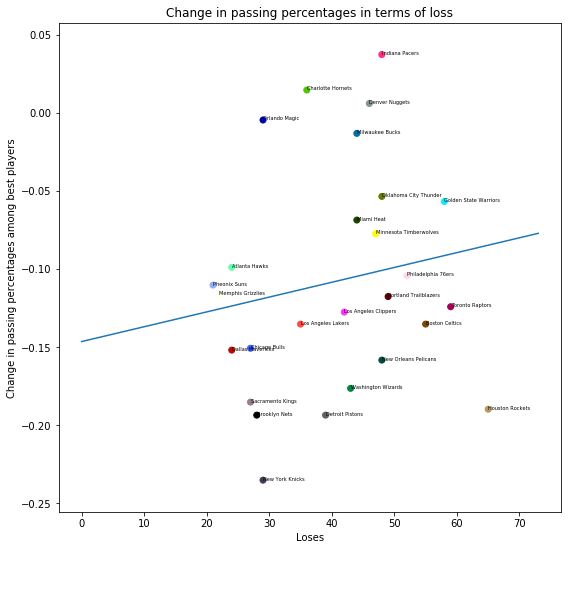

0.410879389621 0.164978570953


In [743]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players:
    xx = num_wins[team]
    yy = difference_win_minus_loss[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in passing percentages in terms of loss")
plt.xlabel("Loses")
plt.ylabel("Change in passing percentages among best players")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

print(p,r)

In [851]:
def reject_outliers(data,corr_data, m=2):
    std_dev = np.std(data)
    mean = np.mean(data)
    temp_indexs = []
    for elem in range(len(data)):
        if (data[elem] - mean) > m * std_dev :
            temp_indexs += [elem]
    #print(temp_indexs)
    temp_indexs.sort(reverse = True)
    for i in temp_indexs:
        del data[i]
        del corr_data[i]
    return


    #temp =  [elem for elem in data if elem - mean < m * std_dev]
    
    #print(len(data))
    #print(len(temp))
    return data

In [849]:
two_best_players_m = {
    "Brooklyn Nets": ["Russell, D'Angelo", "Hollis-Jefferson, Rondae"], 
    "Minnesota Timberwolves":["Butler, Jimmy", "Towns, Karl-Anthony"],
    "Golden State Warriors": ["Curry, Stephen", "Durant, Kevin"], 
    "Los Angeles Clippers": ["Griffin, Blake", "Williams, Lou"], 
    "Los Angeles Lakers": ["Ingram, Brandon","Randle, Julius"], 
    "Washington Wizards": ["Beal, Bradley", "Wall, John"], 
    "Milwaukee Bucks": ["Antetokounmpo, Giannis", "Middleton, Khris"], 
    "Toronto Raptors": ["DeRozan, DeMar", "Lowry, Kyle"], 
    "Philadelphia 76ers": ["Embiid, Joel","Simmons, Ben"], 
    "Boston Celtics":["Irving, Kyrie", "Horford, Al"],  
    "Orlando Magic": ["Fournier, Evan","Gordon, Aaron"], 
    "Atlanta Hawks":["Schroder, Dennis", "Prince, Taurean"],
    "Houston Rockets": ["Harden, James", "Paul, Chris"], 
    #"San Antontio Spurs":  ["Aldridge, LaMarcus","Gay, Rudy"], 
    "New Orleans Pelicans": ["Davis, Anthony","Cousins, DeMarcus"], 
    "Pheonix Suns": ["Booker, Devin","Warren, T.J."], 
    "Sacramento Kings": ["Randolph, Zach", "Hield, Buddy"], 
    "Portland Trailblazers": ["Lillard, Damian","McCollum, CJ"], 
    "Denver Nuggets": ["Jokic, Nikola", "Harris, Gary"],
    "Memphis Grizzlies": ["Evans, Tyreke","Gasol, Marc"], 
    "Miami Heat":["Dragic, Goran", "Waiters, Dion"], 
    "Cleveland Cavaliers": ["James, LeBron", "Love, Kevin"], 
    "Charlotte Hornets":["Walker, Kemba", "Howard, Dwight"], 
    "Chicago Bulls": ["Dunn, Kris", "Portis, Bobby"], 
    "New York Knicks": ["Porzingis, Kristaps", "Hardaway Jr., Tim"], 
    "Indiana Pacers":["Oladipo, Victor", "Bogdanovic, Bojan"] , 
    "Utah Jazz":["Mitchell, Donovan", "Gobert, Rudy"] , 
    "Detroit Pistons": ["Drummond, Andre","Harris, Tobias"], 
    "Dallas Mavericks": ["Barnes, Harrison","Matthews, Wesley"], 
    "Oklahoma City Thunder": ["Westbrook, Russell", "George, Paul"], 
    
}

In [659]:
winning_percentages2 = {} 

for elem in two_best_players_m:
    temp_players = two_best_players_m[elem]
    #print(players[0])
    #print(elem)
    winning_percentages2[elem] = pass_to_specific_player(temp_players[1], temp_players[0],True)
winning_percentages2

{'Atlanta Hawks': 0.33855799373040746,
 'Boston Celtics': 0.33471074380165283,
 'Brooklyn Nets': 0.1805225653206651,
 'Charlotte Hornets': 0.5638629283489097,
 'Chicago Bulls': 0.17391304347826086,
 'Cleveland Cavaliers': 0.4227642276422763,
 'Dallas Mavericks': 0.20186335403726702,
 'Denver Nuggets': 0.2648221343873518,
 'Detroit Pistons': 0.06485355648535562,
 'Golden State Warriors': 0.2222222222222222,
 'Houston Rockets': 0.22772277227722773,
 'Indiana Pacers': 0.2222222222222222,
 'Los Angeles Clippers': 0.14138817480719795,
 'Los Angeles Lakers': 0.163323782234957,
 'Memphis Grizzlies': 0.18543046357615894,
 'Miami Heat': 0.2090909090909091,
 'Milwaukee Bucks': 0.20187793427230039,
 'Minnesota Timberwolves': 0.1613545816733067,
 'New Orleans Pelicans': 0.0929853181076672,
 'New York Knicks': 0.15273775216138327,
 'Oklahoma City Thunder': 0.3925233644859813,
 'Orlando Magic': 0.09523809523809522,
 'Pheonix Suns': 0.15750915750915753,
 'Philadelphia 76ers': 0.14701803051317616,
 'P

In [660]:
losing_percentages2 = {} 

for elem in two_best_players_m:

        temp_players = two_best_players_m[elem]
    #print(players[0])
    #print(elem)
        losing_percentages2[elem] = pass_to_specific_player(temp_players[1], temp_players[0],False)
losing_percentages2

{'Atlanta Hawks': 0.32154340836012857,
 'Boston Celtics': 0.32329317269076313,
 'Brooklyn Nets': 0.17687074829931973,
 'Charlotte Hornets': 0.5618374558303888,
 'Chicago Bulls': 0.13015873015873014,
 'Cleveland Cavaliers': 0.44108761329305135,
 'Dallas Mavericks': 0.19384615384615383,
 'Denver Nuggets': 0.23983739837398374,
 'Detroit Pistons': 0.06581740976645437,
 'Golden State Warriors': 0.1628498727735369,
 'Houston Rockets': 0.10693069306930696,
 'Indiana Pacers': 0.16822429906542052,
 'Los Angeles Clippers': 0.15571776155717762,
 'Los Angeles Lakers': 0.1282798833819242,
 'Memphis Grizzlies': 0.169811320754717,
 'Miami Heat': 0.18227848101265823,
 'Milwaukee Bucks': 0.22488038277511951,
 'Minnesota Timberwolves': 0.14688128772635814,
 'New Orleans Pelicans': 0.07794361525704809,
 'New York Knicks': 0.08746355685131192,
 'Oklahoma City Thunder': 0.39999999999999986,
 'Orlando Magic': 0.07106598984771574,
 'Pheonix Suns': 0.14893617021276592,
 'Philadelphia 76ers': 0.156626506024096

In [661]:
difference_win_minus_loss2 = {}
for elem in winning_percentages2:
    difference_win_minus_loss2[elem] = winning_percentages2[elem] - losing_percentages2[elem]
difference_win_minus_loss2

{'Atlanta Hawks': 0.01701458537027889,
 'Boston Celtics': 0.011417571110889702,
 'Brooklyn Nets': 0.0036518170213453716,
 'Charlotte Hornets': 0.002025472518520921,
 'Chicago Bulls': 0.043754313319530724,
 'Cleveland Cavaliers': -0.01832338565077507,
 'Dallas Mavericks': 0.008017200191113183,
 'Denver Nuggets': 0.024984736013368064,
 'Detroit Pistons': -0.0009638532810987421,
 'Golden State Warriors': 0.0593723494486853,
 'Houston Rockets': 0.12079207920792077,
 'Indiana Pacers': 0.053997923156801686,
 'Los Angeles Clippers': -0.014329586749979667,
 'Los Angeles Lakers': 0.0350438988530328,
 'Memphis Grizzlies': 0.015619142821441945,
 'Miami Heat': 0.026812428078250877,
 'Milwaukee Bucks': -0.02300244850281913,
 'Minnesota Timberwolves': 0.014473293946948573,
 'New Orleans Pelicans': 0.01504170285061912,
 'New York Knicks': 0.06527419531007135,
 'Oklahoma City Thunder': -0.007476635514018559,
 'Orlando Magic': 0.024172105390379478,
 'Pheonix Suns': 0.00857298729639161,
 'Philadelphia 7

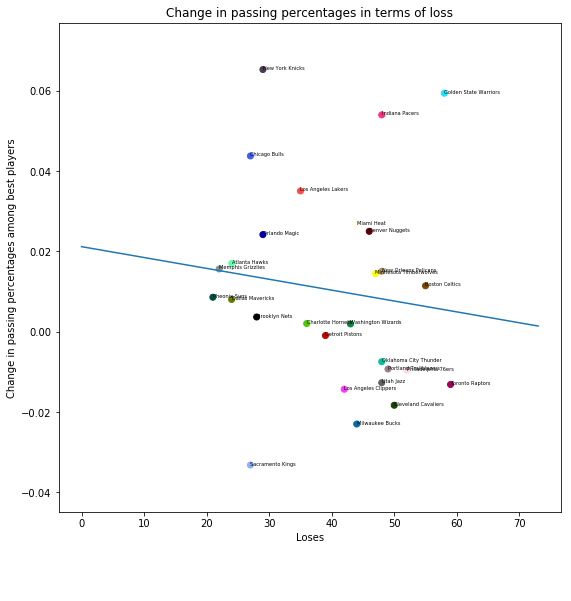

In [662]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_m:
    xx = num_wins[team]
    yy = difference_win_minus_loss2[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in passing percentages in terms of loss")
plt.xlabel("Loses")
plt.ylabel("Change in passing percentages among best players")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [663]:
print(r,p)

-0.125077544758 0.525969138114


In [664]:
def assist_to_specific_player(passing_player,receiving_player,win):
    #print(passing_player)
    stats = player_stats(passing_player,win)
    total = 0
    for elem in stats:
        total += stats[elem][1]
    return stats[receiving_player][1]/total

In [665]:
winning_percentages3 = {} 

for elem in two_best_players_m:
    temp_players = two_best_players_m[elem]
    #print(players[0])
    #print(elem)
    winning_percentages3[elem] = assist_to_specific_player(temp_players[1], temp_players[0],True)
winning_percentages3

{'Atlanta Hawks': 0.07142857142857141,
 'Boston Celtics': 0.25000000000000006,
 'Brooklyn Nets': 0.041666666666666664,
 'Charlotte Hornets': 0.25,
 'Chicago Bulls': 0.0625,
 'Cleveland Cavaliers': 0.3999999999999999,
 'Dallas Mavericks': 0.25806451612903225,
 'Denver Nuggets': 0.2413793103448275,
 'Detroit Pistons': 0.12499999999999997,
 'Golden State Warriors': 0.17857142857142855,
 'Houston Rockets': 0.0641025641025641,
 'Indiana Pacers': 0.1764705882352941,
 'Los Angeles Clippers': 0.11320754716981134,
 'Los Angeles Lakers': 0.16666666666666666,
 'Memphis Grizzlies': 0.11904761904761907,
 'Miami Heat': 0.16666666666666666,
 'Milwaukee Bucks': 0.2571428571428571,
 'Minnesota Timberwolves': 0.1851851851851852,
 'New Orleans Pelicans': 0.28571428571428575,
 'New York Knicks': 0.2162162162162162,
 'Oklahoma City Thunder': 0.18181818181818177,
 'Orlando Magic': 0.23076923076923073,
 'Pheonix Suns': 0.125,
 'Philadelphia 76ers': 0.13095238095238096,
 'Portland Trailblazers': 0.11764705882

In [666]:
losing_percentages3 = {} 

for elem in two_best_players_m:
    temp_players = two_best_players_m[elem]
    #print(players[0])
    #print(elem)
    losing_percentages3[elem] = assist_to_specific_player(temp_players[1], temp_players[0],False)
losing_percentages3

{'Atlanta Hawks': 0.11538461538461536,
 'Boston Celtics': 0.2631578947368421,
 'Brooklyn Nets': 0.08695652173913043,
 'Charlotte Hornets': 0.22222222222222224,
 'Chicago Bulls': 0.0,
 'Cleveland Cavaliers': 0.6428571428571427,
 'Dallas Mavericks': 0.23076923076923075,
 'Denver Nuggets': 0.26923076923076916,
 'Detroit Pistons': 0.05555555555555555,
 'Golden State Warriors': 0.0930232558139535,
 'Houston Rockets': 0.04,
 'Indiana Pacers': 0.25,
 'Los Angeles Clippers': 0.08,
 'Los Angeles Lakers': 0.15,
 'Memphis Grizzlies': 0.125,
 'Miami Heat': 0.09523809523809526,
 'Milwaukee Bucks': 0.2439024390243902,
 'Minnesota Timberwolves': 0.2,
 'New Orleans Pelicans': 0.20000000000000004,
 'New York Knicks': 0.17391304347826086,
 'Oklahoma City Thunder': 0.23529411764705882,
 'Orlando Magic': 0.13043478260869562,
 'Pheonix Suns': 0.11111111111111113,
 'Philadelphia 76ers': 0.14285714285714288,
 'Portland Trailblazers': 0.06451612903225806,
 'Sacramento Kings': 0.05263157894736841,
 'Toronto Ra

In [667]:
difference_win_minus_loss3 = {}
for elem in winning_percentages3:
    difference_win_minus_loss3[elem] = winning_percentages3[elem] - losing_percentages3[elem]
difference_win_minus_loss3

{'Atlanta Hawks': -0.04395604395604395,
 'Boston Celtics': -0.013157894736842035,
 'Brooklyn Nets': -0.04528985507246377,
 'Charlotte Hornets': 0.027777777777777762,
 'Chicago Bulls': 0.0625,
 'Cleveland Cavaliers': -0.24285714285714277,
 'Dallas Mavericks': 0.027295285359801497,
 'Denver Nuggets': -0.02785145888594165,
 'Detroit Pistons': 0.06944444444444442,
 'Golden State Warriors': 0.08554817275747505,
 'Houston Rockets': 0.024102564102564096,
 'Indiana Pacers': -0.0735294117647059,
 'Los Angeles Clippers': 0.033207547169811336,
 'Los Angeles Lakers': 0.016666666666666663,
 'Memphis Grizzlies': -0.005952380952380931,
 'Miami Heat': 0.0714285714285714,
 'Milwaukee Bucks': 0.013240418118466907,
 'Minnesota Timberwolves': -0.014814814814814808,
 'New Orleans Pelicans': 0.08571428571428572,
 'New York Knicks': 0.042303172737955336,
 'Oklahoma City Thunder': -0.05347593582887705,
 'Orlando Magic': 0.1003344481605351,
 'Pheonix Suns': 0.013888888888888867,
 'Philadelphia 76ers': -0.01190

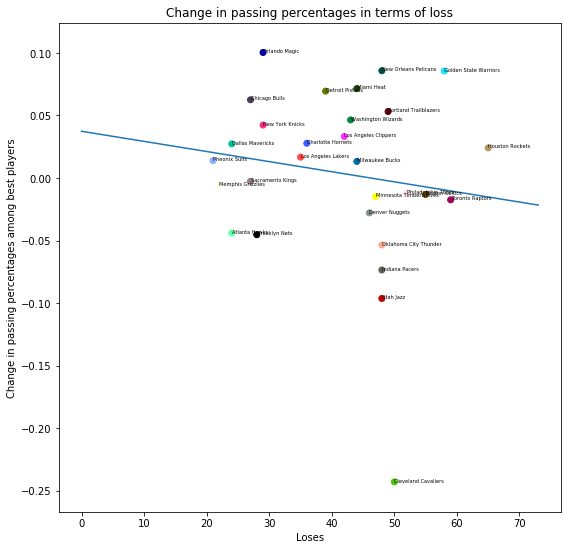

In [668]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_m:
    xx = num_wins[team]
    yy = difference_win_minus_loss3[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in passing percentages in terms of loss")
plt.xlabel("Loses")
plt.ylabel("Change in passing percentages among best players")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [532]:
print(r,p)

-0.144472287547 0.454628612068


In [669]:
winning_percentages4 = {} 

for elem in two_best_players_m:
    temp_players = two_best_players_m[elem]
    #print(players[0])
    #print(elem)
    winning_percentages4[elem] = assist_to_specific_player(temp_players[0], temp_players[1],True)
winning_percentages4

{'Atlanta Hawks': 0.16901408450704228,
 'Boston Celtics': 0.29411764705882354,
 'Brooklyn Nets': 0.14285714285714288,
 'Charlotte Hornets': 0.2295081967213115,
 'Chicago Bulls': 0.08450704225352114,
 'Cleveland Cavaliers': 0.2,
 'Dallas Mavericks': 0.125,
 'Denver Nuggets': 0.2608695652173914,
 'Detroit Pistons': 0.125,
 'Golden State Warriors': 0.19672131147540983,
 'Houston Rockets': 0.034090909090909095,
 'Indiana Pacers': 0.20000000000000004,
 'Los Angeles Clippers': 0.10769230769230773,
 'Los Angeles Lakers': 0.20930232558139536,
 'Memphis Grizzlies': 0.21428571428571436,
 'Miami Heat': 0.05660377358490566,
 'Milwaukee Bucks': 0.17647058823529416,
 'Minnesota Timberwolves': 0.326530612244898,
 'New Orleans Pelicans': 0.07692307692307691,
 'New York Knicks': 0.07142857142857141,
 'Oklahoma City Thunder': 0.21296296296296294,
 'Orlando Magic': 0.0857142857142857,
 'Pheonix Suns': 0.3095238095238096,
 'Philadelphia 76ers': 0.18749999999999994,
 'Portland Trailblazers': 0.185714285714

In [670]:
losing_percentages4 = {} 

for elem in two_best_players_m:
    temp_players = two_best_players_m[elem]
    #print(players[0])
    #print(elem)
    losing_percentages4[elem] = assist_to_specific_player(temp_players[1], temp_players[0],False)
losing_percentages4

{'Atlanta Hawks': 0.11538461538461536,
 'Boston Celtics': 0.2631578947368421,
 'Brooklyn Nets': 0.08695652173913043,
 'Charlotte Hornets': 0.22222222222222224,
 'Chicago Bulls': 0.0,
 'Cleveland Cavaliers': 0.6428571428571427,
 'Dallas Mavericks': 0.23076923076923075,
 'Denver Nuggets': 0.26923076923076916,
 'Detroit Pistons': 0.05555555555555555,
 'Golden State Warriors': 0.0930232558139535,
 'Houston Rockets': 0.04,
 'Indiana Pacers': 0.25,
 'Los Angeles Clippers': 0.08,
 'Los Angeles Lakers': 0.15,
 'Memphis Grizzlies': 0.125,
 'Miami Heat': 0.09523809523809526,
 'Milwaukee Bucks': 0.2439024390243902,
 'Minnesota Timberwolves': 0.2,
 'New Orleans Pelicans': 0.20000000000000004,
 'New York Knicks': 0.17391304347826086,
 'Oklahoma City Thunder': 0.23529411764705882,
 'Orlando Magic': 0.13043478260869562,
 'Pheonix Suns': 0.11111111111111113,
 'Philadelphia 76ers': 0.14285714285714288,
 'Portland Trailblazers': 0.06451612903225806,
 'Sacramento Kings': 0.05263157894736841,
 'Toronto Ra

In [671]:
difference_win_minus_loss4 = {}
for elem in winning_percentages3:
    difference_win_minus_loss4[elem] = winning_percentages4[elem] - losing_percentages4[elem]
difference_win_minus_loss4

{'Atlanta Hawks': 0.053629469122426915,
 'Boston Celtics': 0.03095975232198145,
 'Brooklyn Nets': 0.055900621118012445,
 'Charlotte Hornets': 0.0072859744990892705,
 'Chicago Bulls': 0.08450704225352114,
 'Cleveland Cavaliers': -0.44285714285714267,
 'Dallas Mavericks': -0.10576923076923075,
 'Denver Nuggets': -0.008361204013377754,
 'Detroit Pistons': 0.06944444444444445,
 'Golden State Warriors': 0.10369805566145633,
 'Houston Rockets': -0.0059090909090909055,
 'Indiana Pacers': -0.04999999999999996,
 'Los Angeles Clippers': 0.027692307692307724,
 'Los Angeles Lakers': 0.059302325581395365,
 'Memphis Grizzlies': 0.08928571428571436,
 'Miami Heat': -0.0386343216531896,
 'Milwaukee Bucks': -0.06743185078909605,
 'Minnesota Timberwolves': 0.12653061224489798,
 'New Orleans Pelicans': -0.12307692307692313,
 'New York Knicks': -0.10248447204968945,
 'Oklahoma City Thunder': -0.022331154684095883,
 'Orlando Magic': -0.04472049689440992,
 'Pheonix Suns': 0.19841269841269846,
 'Philadelphia 

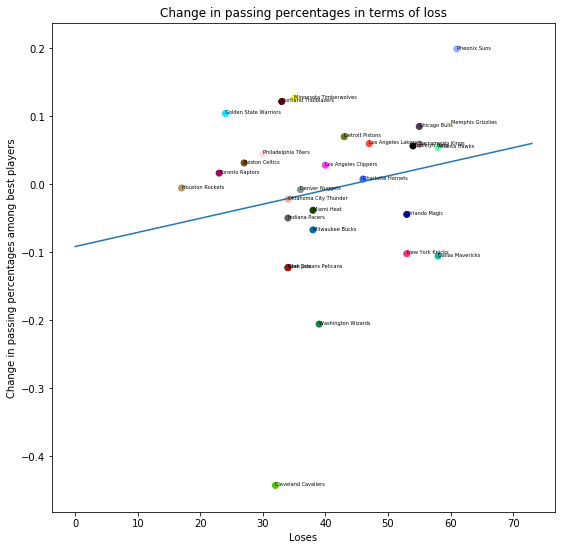

In [833]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_m:
    xx = 82 - num_wins[team]
    yy = difference_win_minus_loss4[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in passing percentages in terms of loss")
plt.xlabel("Loses")
plt.ylabel("Change in passing percentages among best players")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [834]:
print(r,p)

0.207533785714 0.28002692944


In [882]:
two_best_players_win_shares= {
    "Brooklyn Nets": ["Russell, D'Angelo", "LeVert, Caris"], 
    "Minnesota Timberwolves":["Butler, Jimmy", "Wiggins, Andrew"],
    "Golden State Warriors": ["Curry, Stephen", "Durant, Kevin"], 
    "Los Angeles Clippers": ["Williams, Lou","Griffin, Blake"], 
    "Los Angeles Lakers": ["Clarkson, Jordan","Randle, Julius"], 
    "Washington Wizards": ["Wall, John","Beal, Bradley"], 
    "Milwaukee Bucks": ["Antetokounmpo, Giannis", "Bledsoe, Eric"], 
    "Toronto Raptors": ["DeRozan, DeMar", "Valanciunas, Jonas"], 
    "Philadelphia 76ers": ["Embiid, Joel","Simmons, Ben"], 
    "Boston Celtics":["Irving, Kyrie", "Morris, Marcus"],  
    "Orlando Magic": ["Vucevic, Nikola","Gordon, Aaron"], 
    "Atlanta Hawks":["Schroder, Dennis", "Bazemore, Kent"],
    "Houston Rockets": ["Harden, James", "Gordon, Eric"], 
    #"San Antontio Spurs":  ["Aldridge, LaMarcus","Gay, Rudy"], 
    "New Orleans Pelicans": ["Cousins, DeMarcus","Davis, Anthony",], 
    "Pheonix Suns": ["Booker, Devin","Warren, T.J."], 
    "Sacramento Kings": ["Randolph, Zach", "Hield, Buddy"], 
    "Portland Trailblazers": ["Lillard, Damian","McCollum, CJ"], 
    "Denver Nuggets": ["Jokic, Nikola", "Harris, Gary"],
    "Memphis Grizzlies": ["Evans, Tyreke","Gasol, Marc"], 
    "Miami Heat":["Dragic, Goran", "Waiters, Dion"], 
    "Cleveland Cavaliers": ["James, LeBron", "Love, Kevin"], 
    "Charlotte Hornets":["Walker, Kemba", "Howard, Dwight"], 
    "Chicago Bulls": ["Portis, Bobby","Dunn, Kris"], 
    "New York Knicks": ["Porzingis, Kristaps", "Beasley, Michael"], 
    "Indiana Pacers":["Oladipo, Victor", "Sabonis, Domantas"] , 
    #"Utah Jazz":["Mitchell, Donovan", "Gobert, Rudy"] , 
    "Detroit Pistons": ["Harris, Tobias","Jackson, Reggie"], 
    "Dallas Mavericks": ["Barnes, Harrison","Barea, J.J."], 
    "Oklahoma City Thunder": ["Westbrook, Russell", "George, Paul"], 
    
}

In [857]:
winning_percentages_5 = {} 

for elem in two_best_players_usage:
    temp_players = two_best_players_usage[elem]
    #print(players[0])
    #print(elem)
    winning_percentages_5[elem] = pass_to_specific_player(temp_players[1], temp_players[0],True)
winning_percentages_5

{'Atlanta Hawks': 0.41709844559585485,
 'Boston Celtics': 0.206081081081081,
 'Brooklyn Nets': 0.07204610951008647,
 'Charlotte Hornets': 0.5638629283489097,
 'Chicago Bulls': 0.07534246575342467,
 'Cleveland Cavaliers': 0.4227642276422763,
 'Dallas Mavericks': 0.10638297872340426,
 'Denver Nuggets': 0.2648221343873518,
 'Detroit Pistons': 0.2545090180360722,
 'Golden State Warriors': 0.2222222222222222,
 'Houston Rockets': 0.1782178217821782,
 'Indiana Pacers': 0.1930693069306931,
 'Los Angeles Clippers': 0.14144736842105265,
 'Los Angeles Lakers': 0.12893982808022922,
 'Memphis Grizzlies': 0.18543046357615894,
 'Miami Heat': 0.2090909090909091,
 'Milwaukee Bucks': 0.2924335378323108,
 'Minnesota Timberwolves': 0.10859728506787329,
 'New Orleans Pelicans': 0.05689277899343542,
 'New York Knicks': 0.008849557522123892,
 'Oklahoma City Thunder': 0.3925233644859813,
 'Orlando Magic': 0.14536340852130322,
 'Pheonix Suns': 0.15750915750915753,
 'Philadelphia 76ers': 0.14701803051317616,
 '

In [858]:
losing_percentages_5 = {} 

for elem in two_best_players_usage:
    temp_players = two_best_players_usage[elem]
    #print(players[0])
    #print(elem)
    losing_percentages_5[elem] = pass_to_specific_player(temp_players[1], temp_players[0],False)
losing_percentages_5

{'Atlanta Hawks': 0.3306010928961748,
 'Boston Celtics': 0.21202531645569617,
 'Brooklyn Nets': 0.09141274238227146,
 'Charlotte Hornets': 0.5618374558303888,
 'Chicago Bulls': 0.09057301293900186,
 'Cleveland Cavaliers': 0.44108761329305135,
 'Dallas Mavericks': 0.13645621181262726,
 'Denver Nuggets': 0.23983739837398374,
 'Detroit Pistons': 0.27348643006263046,
 'Golden State Warriors': 0.1628498727735369,
 'Houston Rockets': 0.17131474103585656,
 'Indiana Pacers': 0.17999999999999994,
 'Los Angeles Clippers': 0.13179571663920925,
 'Los Angeles Lakers': 0.15451895043731775,
 'Memphis Grizzlies': 0.169811320754717,
 'Miami Heat': 0.18227848101265823,
 'Milwaukee Bucks': 0.26716141001855287,
 'Minnesota Timberwolves': 0.07272727272727272,
 'New Orleans Pelicans': 0.05250596658711216,
 'New York Knicks': 0.013468013468013471,
 'Oklahoma City Thunder': 0.39999999999999986,
 'Orlando Magic': 0.1370558375634518,
 'Pheonix Suns': 0.14893617021276592,
 'Philadelphia 76ers': 0.156626506024096

In [859]:
difference_win_minus_loss_5 = {}
for elem in winning_percentages_5:
    difference_win_minus_loss_5[elem] = winning_percentages_5[elem] - losing_percentages_5[elem]
difference_win_minus_loss_5

{'Atlanta Hawks': 0.08649735269968006,
 'Boston Celtics': -0.005944235374615164,
 'Brooklyn Nets': -0.019366632872184986,
 'Charlotte Hornets': 0.002025472518520921,
 'Chicago Bulls': -0.01523054718557719,
 'Cleveland Cavaliers': -0.01832338565077507,
 'Dallas Mavericks': -0.03007323308922301,
 'Denver Nuggets': 0.024984736013368064,
 'Detroit Pistons': -0.018977412026558282,
 'Golden State Warriors': 0.0593723494486853,
 'Houston Rockets': 0.006903080746321649,
 'Indiana Pacers': 0.013069306930693164,
 'Los Angeles Clippers': 0.009651651781843407,
 'Los Angeles Lakers': -0.025579122357088535,
 'Memphis Grizzlies': 0.015619142821441945,
 'Miami Heat': 0.026812428078250877,
 'Milwaukee Bucks': 0.025272127813757927,
 'Minnesota Timberwolves': 0.03587001234060057,
 'New Orleans Pelicans': 0.004386812406323264,
 'New York Knicks': -0.004618455945889579,
 'Oklahoma City Thunder': -0.007476635514018559,
 'Orlando Magic': 0.008307570957851423,
 'Pheonix Suns': 0.00857298729639161,
 'Philadelp

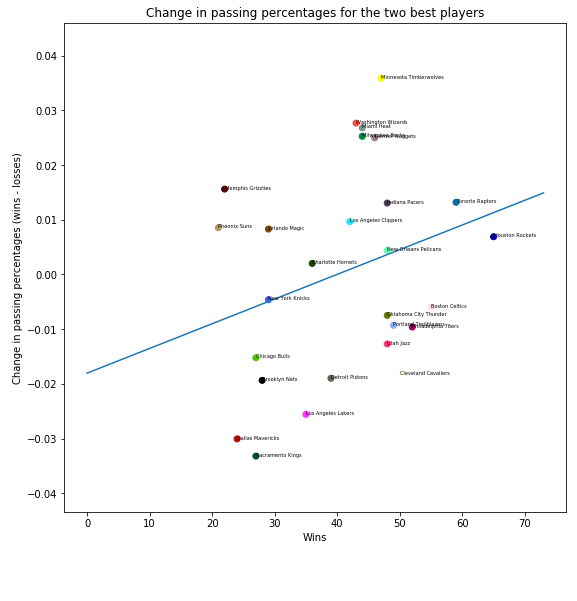

In [860]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_usage:
    xx = num_wins[team]
    yy = difference_win_minus_loss_5[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in passing percentages for the two best players")
plt.xlabel("Wins")
plt.ylabel("Change in passing percentages (wins - losses)")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [861]:
print(p,r)

0.156345864442 0.280553051057


In [835]:
winning_percentages1 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    winning_percentages1[elem] = pass_to_specific_player(temp_players[0], temp_players[1],True)
winning_percentages1

{'Atlanta Hawks': 0.11058451816745656,
 'Boston Celtics': 0.33471074380165283,
 'Brooklyn Nets': 0.320665083135392,
 'Charlotte Hornets': 0.5638629283489097,
 'Chicago Bulls': 0.16040100250626568,
 'Dallas Mavericks': 0.09498680738786276,
 'Denver Nuggets': 0.2252475247524752,
 'Detroit Pistons': 0.16846652267818574,
 'Golden State Warriors': 0.2222222222222222,
 'Houston Rockets': 0.5091863517060365,
 'Indiana Pacers': 0.2776617954070981,
 'Los Angeles Clippers': 0.029605263157894746,
 'Los Angeles Lakers': 0.15302491103202845,
 'Memphis Grizzlies': 0.18543046357615894,
 'Miami Heat': 0.1632653061224489,
 'Milwaukee Bucks': 0.20187793427230039,
 'Minnesota Timberwolves': 0.2569269521410579,
 'New Orleans Pelicans': 0.0929853181076672,
 'New York Knicks': 0.14525139664804468,
 'Oklahoma City Thunder': 0.5877862595419847,
 'Orlando Magic': 0.13626373626373628,
 'Pheonix Suns': 0.0695970695970696,
 'Philadelphia 76ers': 0.34949494949494947,
 'Portland Trailblazers': 0.22284122562674097,


In [840]:
losing_percentages1 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    
    losing_percentages1[elem] = pass_to_specific_player(temp_players[0], temp_players[1],False)
losing_percentages1

{'Atlanta Hawks': 0.3069306930693069,
 'Boston Celtics': 0.26964285714285713,
 'Brooklyn Nets': 0.18312387791741466,
 'Charlotte Hornets': 0.15978456014362658,
 'Chicago Bulls': 0.2571428571428571,
 'Dallas Mavericks': 0.07516339869281047,
 'Denver Nuggets': 0.16225165562913907,
 'Detroit Pistons': 0.1858407079646018,
 'Golden State Warriors': 0.24712643678160914,
 'Houston Rockets': 0.12660944206008581,
 'Indiana Pacers': 0.24871794871794875,
 'Los Angeles Clippers': 0.05203619909502263,
 'Los Angeles Lakers': 0.12244897959183672,
 'Memphis Grizzlies': 0.288135593220339,
 'Miami Heat': 0.07213930348258706,
 'Milwaukee Bucks': 0.1590106007067138,
 'Minnesota Timberwolves': 0.14688128772635814,
 'New Orleans Pelicans': 0.05250596658711216,
 'New York Knicks': 0.14859437751004012,
 'Oklahoma City Thunder': 0.18269230769230765,
 'Orlando Magic': 0.1688311688311688,
 'Pheonix Suns': 0.09999999999999999,
 'Philadelphia 76ers': 0.1566265060240964,
 'Portland Trailblazers': 0.2286245353159851

In [841]:
difference_win_minus_loss1 = {}
for elem in winning_percentages1:
    difference_win_minus_loss1[elem] = winning_percentages1[elem] - losing_percentages1[elem]
difference_win_minus_loss1


{'Atlanta Hawks': -0.19634617490185036,
 'Boston Celtics': 0.0650678866587957,
 'Brooklyn Nets': 0.13754120521797733,
 'Charlotte Hornets': 0.40407836820528314,
 'Chicago Bulls': -0.09674185463659143,
 'Dallas Mavericks': 0.019823408695052294,
 'Denver Nuggets': 0.06299586912333613,
 'Detroit Pistons': -0.017374185286416072,
 'Golden State Warriors': -0.024904214559386934,
 'Houston Rockets': 0.3825769096459507,
 'Indiana Pacers': 0.028943846689149372,
 'Los Angeles Clippers': -0.02243093593712788,
 'Los Angeles Lakers': 0.03057593144019173,
 'Memphis Grizzlies': -0.10270512964418005,
 'Miami Heat': 0.09112600263986186,
 'Milwaukee Bucks': 0.042867333565586585,
 'Minnesota Timberwolves': 0.11004566441469973,
 'New Orleans Pelicans': 0.04047935152055505,
 'New York Knicks': -0.0033429808619954426,
 'Oklahoma City Thunder': 0.40509395184967706,
 'Orlando Magic': -0.032567432567432525,
 'Pheonix Suns': -0.030402930402930392,
 'Philadelphia 76ers': 0.19286844347085308,
 'Portland Trailblaz

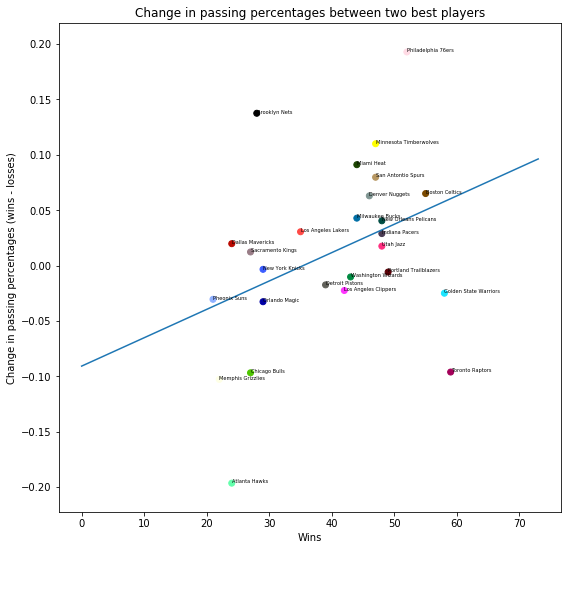

In [853]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_win_shares:
    xx = num_wins[team] 
    yy = difference_win_minus_loss1[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in passing percentages between two best players")
plt.xlabel("Wins")
plt.ylabel("Change in passing percentages (wins - losses)")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [854]:
print(r,p)

0.370324149202 0.0625667321298


In [912]:
winning_percentages_6 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    winning_percentages_6[elem] = pass_to_specific_player(temp_players[1], temp_players[0],True)
winning_percentages_6

{'Atlanta Hawks': 0.41709844559585485,
 'Boston Celtics': 0.206081081081081,
 'Brooklyn Nets': 0.07204610951008647,
 'Charlotte Hornets': 0.5638629283489097,
 'Chicago Bulls': 0.07534246575342467,
 'Cleveland Cavaliers': 0.4227642276422763,
 'Dallas Mavericks': 0.10638297872340426,
 'Denver Nuggets': 0.2648221343873518,
 'Detroit Pistons': 0.2545090180360722,
 'Golden State Warriors': 0.2222222222222222,
 'Houston Rockets': 0.1782178217821782,
 'Indiana Pacers': 0.1930693069306931,
 'Los Angeles Clippers': 0.14144736842105265,
 'Los Angeles Lakers': 0.12893982808022922,
 'Memphis Grizzlies': 0.18543046357615894,
 'Miami Heat': 0.2090909090909091,
 'Milwaukee Bucks': 0.2924335378323108,
 'Minnesota Timberwolves': 0.10859728506787329,
 'New Orleans Pelicans': 0.05689277899343542,
 'New York Knicks': 0.008849557522123892,
 'Oklahoma City Thunder': 0.3925233644859813,
 'Orlando Magic': 0.14536340852130322,
 'Pheonix Suns': 0.15750915750915753,
 'Philadelphia 76ers': 0.14701803051317616,
 '

In [913]:
losing_percentages_6 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    losing_percentages_6[elem] = pass_to_specific_player(temp_players[1], temp_players[0],False)
losing_percentages_6

{'Atlanta Hawks': 0.3306010928961748,
 'Boston Celtics': 0.21202531645569617,
 'Brooklyn Nets': 0.09141274238227146,
 'Charlotte Hornets': 0.5618374558303888,
 'Chicago Bulls': 0.09057301293900186,
 'Cleveland Cavaliers': 0.44108761329305135,
 'Dallas Mavericks': 0.13645621181262726,
 'Denver Nuggets': 0.23983739837398374,
 'Detroit Pistons': 0.27348643006263046,
 'Golden State Warriors': 0.1628498727735369,
 'Houston Rockets': 0.17131474103585656,
 'Indiana Pacers': 0.17999999999999994,
 'Los Angeles Clippers': 0.13179571663920925,
 'Los Angeles Lakers': 0.15451895043731775,
 'Memphis Grizzlies': 0.169811320754717,
 'Miami Heat': 0.18227848101265823,
 'Milwaukee Bucks': 0.26716141001855287,
 'Minnesota Timberwolves': 0.07272727272727272,
 'New Orleans Pelicans': 0.05250596658711216,
 'New York Knicks': 0.013468013468013471,
 'Oklahoma City Thunder': 0.39999999999999986,
 'Orlando Magic': 0.1370558375634518,
 'Pheonix Suns': 0.14893617021276592,
 'Philadelphia 76ers': 0.156626506024096

In [914]:
difference_win_minus_loss_6 = {}
for elem in winning_percentages_6:
    difference_win_minus_loss_6[elem] = winning_percentages_6[elem] - losing_percentages_6[elem]
difference_win_minus_loss_6

{'Atlanta Hawks': 0.08649735269968006,
 'Boston Celtics': -0.005944235374615164,
 'Brooklyn Nets': -0.019366632872184986,
 'Charlotte Hornets': 0.002025472518520921,
 'Chicago Bulls': -0.01523054718557719,
 'Cleveland Cavaliers': -0.01832338565077507,
 'Dallas Mavericks': -0.03007323308922301,
 'Denver Nuggets': 0.024984736013368064,
 'Detroit Pistons': -0.018977412026558282,
 'Golden State Warriors': 0.0593723494486853,
 'Houston Rockets': 0.006903080746321649,
 'Indiana Pacers': 0.013069306930693164,
 'Los Angeles Clippers': 0.009651651781843407,
 'Los Angeles Lakers': -0.025579122357088535,
 'Memphis Grizzlies': 0.015619142821441945,
 'Miami Heat': 0.026812428078250877,
 'Milwaukee Bucks': 0.025272127813757927,
 'Minnesota Timberwolves': 0.03587001234060057,
 'New Orleans Pelicans': 0.004386812406323264,
 'New York Knicks': -0.004618455945889579,
 'Oklahoma City Thunder': -0.007476635514018559,
 'Orlando Magic': 0.008307570957851423,
 'Pheonix Suns': 0.00857298729639161,
 'Philadelp

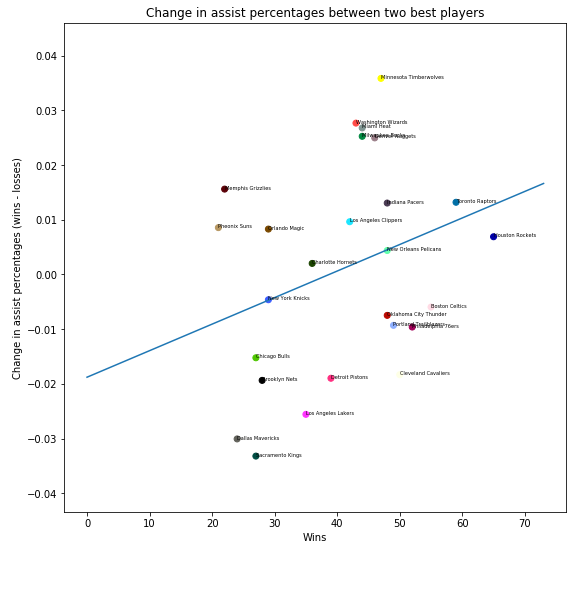

In [915]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_win_shares:
    xx = num_wins[team] 
    yy = difference_win_minus_loss_6[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in assist percentages between two best players")
plt.xlabel("Wins")
plt.ylabel("Change in assist percentages (wins - losses)")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [916]:
print(r,p)

0.302285387998 0.133375890023


In [906]:
winning_percentages_7 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    winning_percentages_7[elem] = assist_to_specific_player(temp_players[0], temp_players[1],True)
winning_percentages_7

{'Atlanta Hawks': 0.15492957746478878,
 'Boston Celtics': 0.09803921568627452,
 'Brooklyn Nets': 0.0634920634920635,
 'Charlotte Hornets': 0.2295081967213115,
 'Chicago Bulls': 0.0625,
 'Cleveland Cavaliers': 0.2,
 'Dallas Mavericks': 0.0625,
 'Denver Nuggets': 0.2608695652173914,
 'Detroit Pistons': 0.041666666666666664,
 'Golden State Warriors': 0.19672131147540983,
 'Houston Rockets': 0.11363636363636365,
 'Indiana Pacers': 0.1777777777777778,
 'Los Angeles Clippers': 0.11320754716981134,
 'Los Angeles Lakers': 0.19230769230769224,
 'Memphis Grizzlies': 0.21428571428571436,
 'Miami Heat': 0.05660377358490566,
 'Milwaukee Bucks': 0.23529411764705888,
 'Minnesota Timberwolves': 0.163265306122449,
 'New Orleans Pelicans': 0.28571428571428575,
 'New York Knicks': 0.0,
 'Oklahoma City Thunder': 0.21296296296296294,
 'Orlando Magic': 0.2647058823529412,
 'Pheonix Suns': 0.3095238095238096,
 'Philadelphia 76ers': 0.18749999999999994,
 'Portland Trailblazers': 0.18571428571428575,
 'Sacrame

In [907]:
losing_percentages_7 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    losing_percentages_7[elem] = assist_to_specific_player(temp_players[0], temp_players[1],False)
losing_percentages_7

{'Atlanta Hawks': 0.14285714285714288,
 'Boston Celtics': 0.10638297872340427,
 'Brooklyn Nets': 0.04347826086956523,
 'Charlotte Hornets': 0.19607843137254904,
 'Chicago Bulls': 0.0,
 'Cleveland Cavaliers': 0.1621621621621622,
 'Dallas Mavericks': 0.04999999999999999,
 'Denver Nuggets': 0.3043478260869566,
 'Detroit Pistons': 0.0,
 'Golden State Warriors': 0.2641509433962264,
 'Houston Rockets': 0.20512820512820515,
 'Indiana Pacers': 0.21052631578947367,
 'Los Angeles Clippers': 0.08,
 'Los Angeles Lakers': 0.18518518518518512,
 'Memphis Grizzlies': 0.27999999999999997,
 'Miami Heat': 0.04651162790697676,
 'Milwaukee Bucks': 0.1702127659574469,
 'Minnesota Timberwolves': 0.28260869565217395,
 'New Orleans Pelicans': 0.20000000000000004,
 'New York Knicks': 0.0,
 'Oklahoma City Thunder': 0.23863636363636367,
 'Orlando Magic': 0.18749999999999994,
 'Pheonix Suns': 0.22916666666666669,
 'Philadelphia 76ers': 0.2413793103448275,
 'Portland Trailblazers': 0.11864406779661016,
 'Sacramento

In [908]:
difference_win_minus_loss_7 = {}
for elem in winning_percentages_7:
    difference_win_minus_loss_7[elem] = winning_percentages_7[elem] - losing_percentages_7[elem]
difference_win_minus_loss_7

{'Atlanta Hawks': 0.012072434607645899,
 'Boston Celtics': -0.008343763037129748,
 'Brooklyn Nets': 0.020013802622498272,
 'Charlotte Hornets': 0.033429765348762464,
 'Chicago Bulls': 0.0625,
 'Cleveland Cavaliers': 0.03783783783783781,
 'Dallas Mavericks': 0.012500000000000011,
 'Denver Nuggets': -0.04347826086956519,
 'Detroit Pistons': 0.041666666666666664,
 'Golden State Warriors': -0.06742963192081658,
 'Houston Rockets': -0.0914918414918415,
 'Indiana Pacers': -0.03274853801169586,
 'Los Angeles Clippers': 0.033207547169811336,
 'Los Angeles Lakers': 0.007122507122507116,
 'Memphis Grizzlies': -0.06571428571428561,
 'Miami Heat': 0.010092145677928904,
 'Milwaukee Bucks': 0.06508135168961199,
 'Minnesota Timberwolves': -0.11934338952972495,
 'New Orleans Pelicans': 0.08571428571428572,
 'New York Knicks': 0.0,
 'Oklahoma City Thunder': -0.025673400673400737,
 'Orlando Magic': 0.07720588235294124,
 'Pheonix Suns': 0.0803571428571429,
 'Philadelphia 76ers': -0.05387931034482757,
 'P

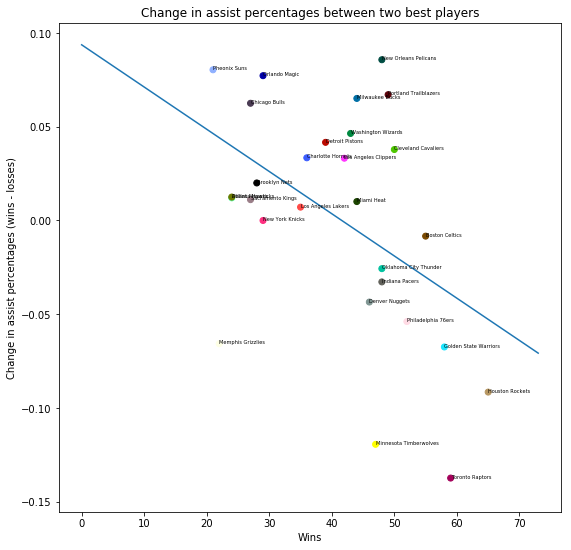

In [909]:
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_win_shares:
    xx = num_wins[team] 
    yy = difference_win_minus_loss_7[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in assist percentages between two best players")
plt.xlabel("Wins")
plt.ylabel("Change in assist percentages (wins - losses)")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [910]:
print(r,p)

-0.463038452837 0.0130885956625


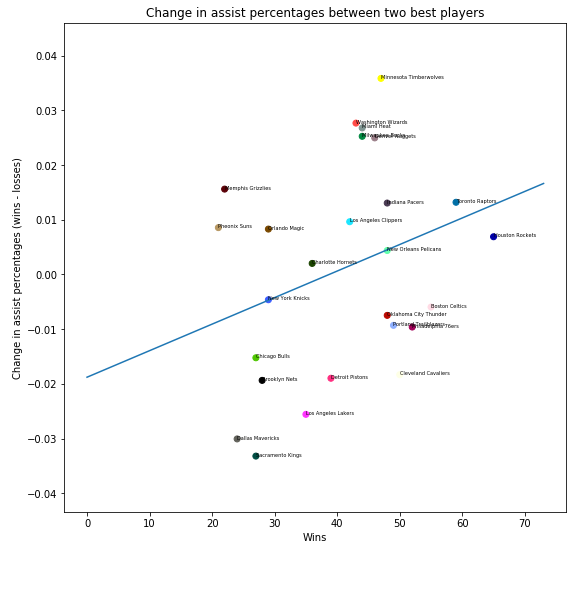

In [920]:
winning_percentages_8 = {} 

for elem in two_best_players_usage:
    temp_players = two_best_players_usage[elem]
    #print(players[0])
    #print(elem)
    winning_percentages_8[elem] = pass_to_specific_player(temp_players[1], temp_players[0],True)
losing_percentages_8 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_win_shares[elem]
    #print(players[0])
    #print(elem)
    losing_percentages_8[elem] = pass_to_specific_player(temp_players[1], temp_players[0],False)
difference_win_minus_loss_8 = {}
for elem in winning_percentages_8:
    difference_win_minus_loss_8[elem] = winning_percentages_8[elem] - losing_percentages_8[elem]
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_win_shares:
    xx = num_wins[team] 
    yy = difference_win_minus_loss_8[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in assist percentages between two best players")
plt.xlabel("Wins")
plt.ylabel("Change in assist percentages (wins - losses)")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [921]:
print(r,p)

0.302285387998 0.133375890023


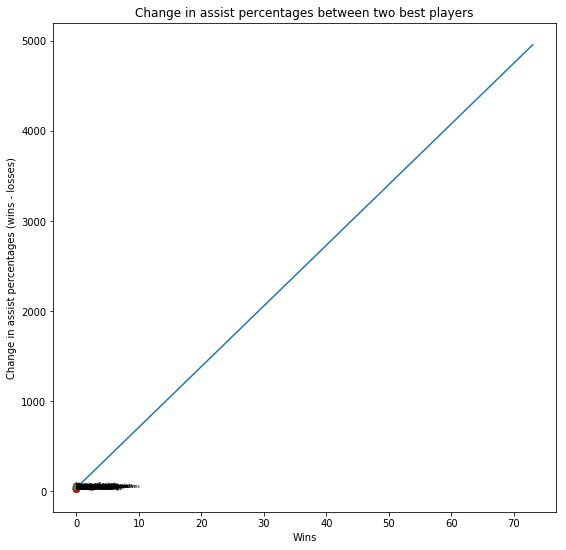

In [932]:
winning_percentages_8 = {} 

for elem in two_best_players_usage:
    temp_players = two_best_players_usage[elem]
    #print(players[0])
    #print(elem)
    winning_percentages_8[elem] = pass_to_specific_player(temp_players[1], temp_players[0],True)
losing_percentages_8 = {} 

for elem in two_best_players_win_shares:
    temp_players = two_best_players_usage[elem]
    #print(players[0])
    #print(elem)
    losing_percentages_8[elem] = pass_to_specific_player(temp_players[1], temp_players[0],False)
difference_win_minus_loss_8 = {}
for elem in winning_percentages_8:
    difference_win_minus_loss_8[elem] = winning_percentages_8[elem] - losing_percentages_8[elem]
x = []
y = []
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]
plt.figure(figsize=(9,9))
for team in two_best_players_win_shares:
    yy = num_wins[team] 
    xx = difference_win_minus_loss_8[team]
    x.append(xx)
    y.append(yy)
    plt.annotate(team,(xx,yy), fontsize=5)
reject_outliers(y,x)
plt.scatter(x,y,c=colors)
plt.title("Change in assist percentages between two best players")
plt.xlabel("Wins")
plt.ylabel("Change in assist percentages (wins - losses)")
#plt.show()
b,m,r,p,_ = scipy.stats.linregress(x,y)
yz = np.poly1d([b,m])(np.arange(74))
plt.plot(np.arange(74),yz)
plt.show()

In [933]:
print(r,p)

0.157098844641 0.43388516502
